Loading the dataset from TensorFlow

In [1]:
#Import the required Libraries
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image
import os


train_dataset, info = tfds.load("stanford_dogs", split="train", with_info=True, as_supervised=False)
test_dataset = tfds.load("stanford_dogs", split="test", as_supervised=False)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.2IOH4H_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.2IOH4H_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


Cropping as per the Bounding Box Coordinates

Saved cropped_images/train/n02094433-yorkshire_terrier/n02094433-yorkshire_terrier_36_0.jpg


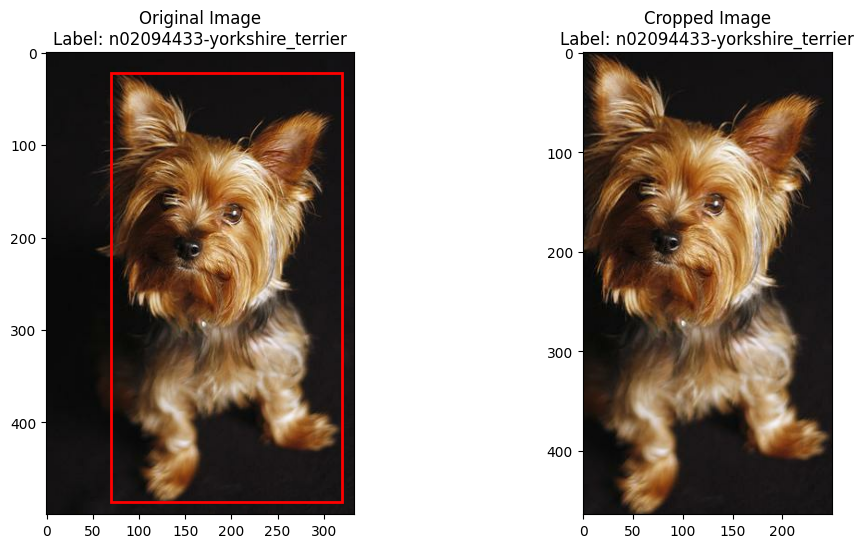

Saved cropped_images/train/n02115913-dhole/n02115913-dhole_118_1.jpg


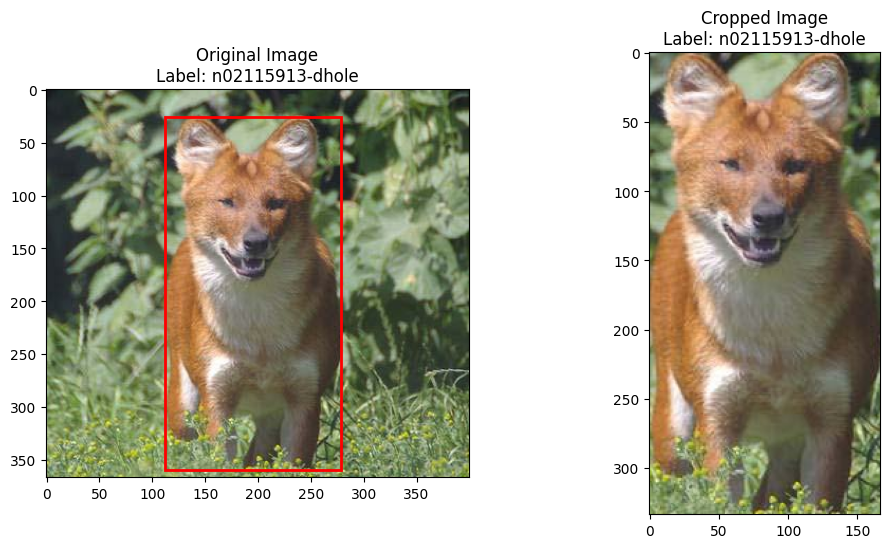

Saved cropped_images/train/n02097130-giant_schnauzer/n02097130-giant_schnauzer_46_2.jpg


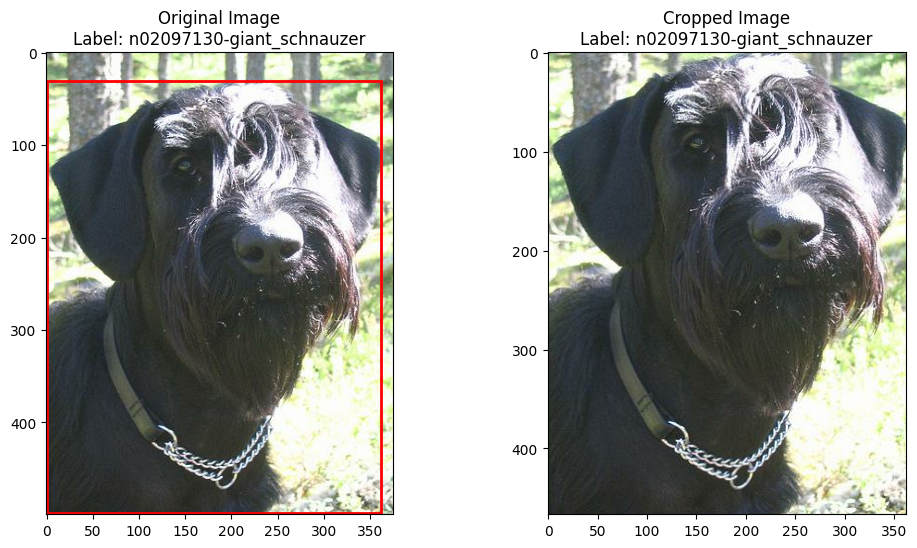

Saved cropped_images/train/n02111129-leonberg/n02111129-leonberg_103_3.jpg


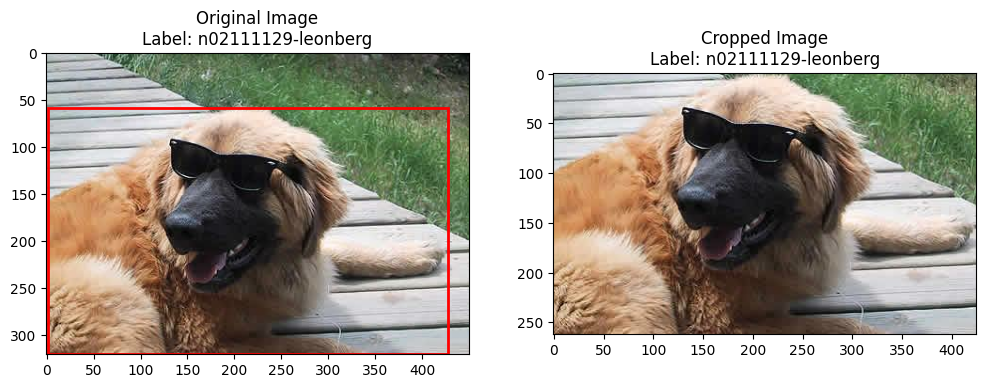

Saved cropped_images/train/n02113624-toy_poodle/n02113624-toy_poodle_113_4.jpg


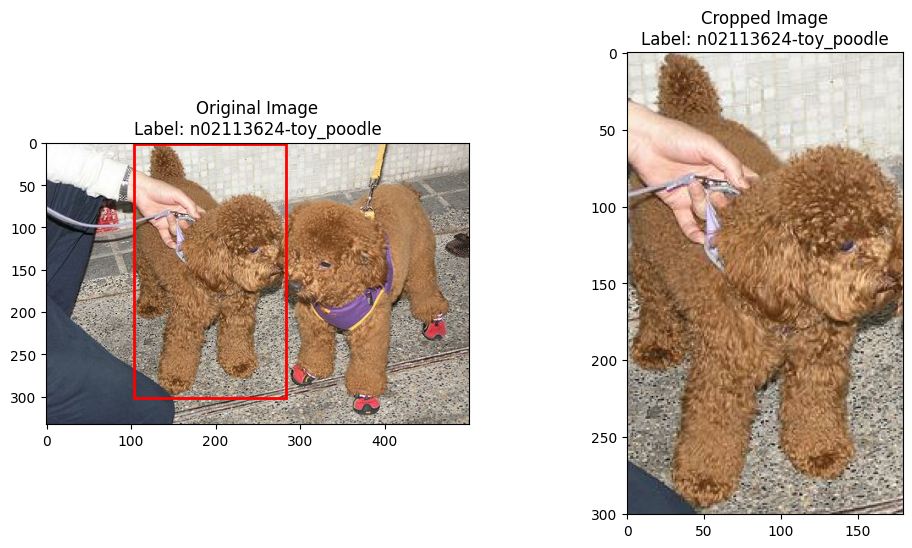

Saved cropped_images/train/n02113978-mexican_hairless/n02113978-mexican_hairless_116_5.jpg


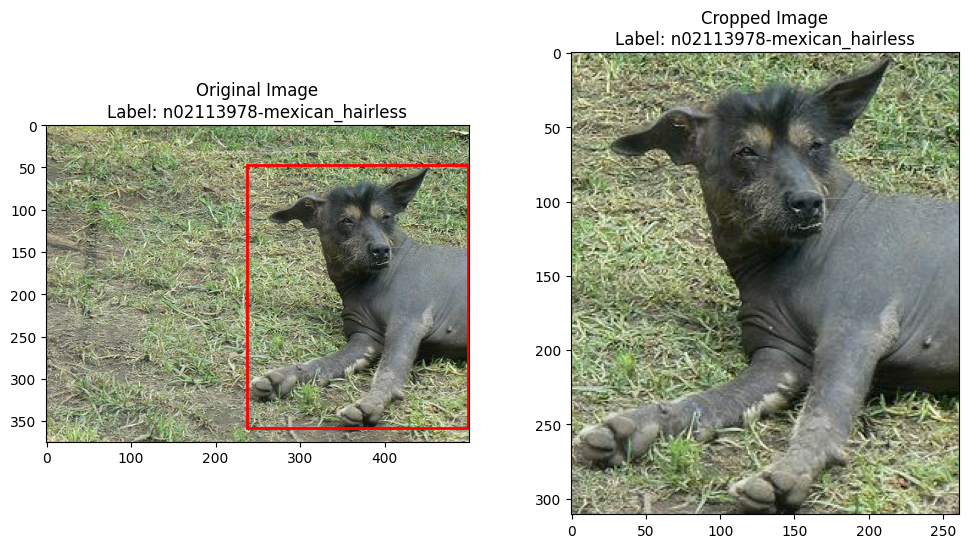

Streaming output truncated to the last 5000 lines.
Saved cropped_images/test/n02105641-old_english_sheepdog/n02105641-old_english_sheepdog_78_3580.jpg
Saved cropped_images/test/n02088364-beagle/n02088364-beagle_11_3581.jpg
Saved cropped_images/test/n02106550-rottweiler/n02106550-rottweiler_83_3582.jpg
Saved cropped_images/test/n02102177-welsh_springer_spaniel/n02102177-welsh_springer_spaniel_67_3583.jpg
Saved cropped_images/test/n02111277-newfoundland/n02111277-newfoundland_104_3584.jpg
Saved cropped_images/test/n02100236-german_short-haired_pointer/n02100236-german_short-haired_pointer_59_3585.jpg
Saved cropped_images/test/n02098286-west_highland_white_terrier/n02098286-west_highland_white_terrier_52_3586.jpg
Saved cropped_images/test/n02087046-toy_terrier/n02087046-toy_terrier_7_3587.jpg
Saved cropped_images/test/n02107683-bernese_mountain_dog/n02107683-bernese_mountain_dog_88_3588.jpg
Saved cropped_images/test/n02112350-keeshond/n02112350-keeshond_109_3589.jpg
Saved cropped_images/t

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directory to save cropped images
output_dir_train = "cropped_images/train"
output_dir_test = "cropped_images/test"
os.makedirs(output_dir_train, exist_ok=True)
os.makedirs(output_dir_test, exist_ok=True)

# Initialize a counter to track the number of images displayed
display_count = 0

# Function to process, visualize, and save cropped images
def process_and_save(dataset, output_dir, max_display=6):
    global display_count

    for i, data in enumerate(dataset):
        image = np.array(data['image'])
        bbox = data['objects']['bbox'][0]
        label_index = data['label']
        label_name = info.features['label'].int2str(label_index)


        height, width, _ = image.shape
        y_min, x_min, y_max, x_max = int(bbox[0] * height), int(bbox[1] * width), int(bbox[2] * height), int(bbox[3] * width)

        # Crop the image
        cropped_image = Image.fromarray(image).crop((x_min, y_min, x_max, y_max))


        label_dir = os.path.join(output_dir, label_name)
        os.makedirs(label_dir, exist_ok=True)
        file_name = f"{label_name}_{label_index}_{i}.jpg"
        file_path = os.path.join(label_dir, file_name)
        cropped_image.save(file_path)
        print(f"Saved {file_path}")


        if display_count < max_display:
            fig, ax = plt.subplots(1, 2, figsize=(12, 6))
            ax[0].imshow(image)
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
            ax[0].add_patch(rect)
            ax[0].set_title(f"Original Image\nLabel: {label_name}", fontsize=12)
            ax[1].imshow(cropped_image)
            ax[1].set_title(f"Cropped Image\nLabel: {label_name}", fontsize=12)
            plt.show()
            display_count += 1

# Apply cropping and save both training and test datasets
process_and_save(train_dataset, output_dir_train)
process_and_save(test_dataset, output_dir_test)


In [3]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 model (pre-trained or from scratch)
model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)  # No classification head

# Print model summary to see the number of filters/channels in each layer
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model (no top layer)
model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)

# Select a layer from which to extract output (e.g., last convolutional layer)
layer_name = 'block_16_project'  # Change to any specific layer name you're interested in
layer_output = model.get_layer(layer_name).output

# Create a new model that outputs the selected layer
intermediate_model = Model(inputs=model.input, outputs=layer_output)

# Check the output shape of the selected layer
output_shape = intermediate_model.output_shape
print(f"Output shape of {layer_name}: {output_shape}")


Output shape of block_16_project: (None, 7, 7, 320)


Data Augmentation with a Batch Size of 32

In [ ]:
import tensorflow as tf
import os


train_dir = 'cropped_images/train'
test_dir = 'cropped_images/test'


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical' )

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical')

normalization_layer = tf.keras.layers.Rescaling(1./255)


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("Datasets prepared with normalization and data augmentation applied to training data.")

Found 12000 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.
Datasets prepared with normalization and data augmentation applied to training data.


Checking the Mobilenet Architecture

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

mobilenet = MobileNetV2(weights='imagenet', include_top=True)
mobilenet.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

Baseline Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
mobilenet.trainable = False

# Build the model with MaxPooling2D and Flatten
model = models.Sequential([
    mobilenet,
    layers.MaxPooling2D(pool_size=(7, 7)),  # Reduce 7x7 spatial dimensions to 1x1
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dense(120, activation='softmax')  # Add output layer for 120 classes
])

# Compile the model
model.compile(
    optimizer='adam'
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")






9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 382ms/step - accuracy: 0.1271 - loss: 7.2682 - val_accuracy: 0.5241 - val_loss: 2.1546
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 134s 357ms/step - accuracy: 0.3387 - loss: 4.1435 - val_accuracy: 0.6041 - val_loss: 1.8077
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 150s 379ms/step - accuracy: 0.4023 - loss: 3.7526 - val_accuracy: 0.6148 - val_loss: 1.9330
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 203s 382ms/step - accuracy: 0.4338 - loss: 3.5176 - val_accuracy: 0.6262 - val_loss: 1.9330
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 203s 384ms/step - accuracy: 0.4454 - loss: 3.5165 - val_accuracy: 0.6378 - val_loss: 1.8768
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 141s 376ms/step - accuracy: 0.4471 - loss: 3.5693 - val_accuracy: 0.6872 - val_loss: 1.4998
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 150s 398ms/step - accuracy: 0.4827 - loss: 3.1858 - val_accuracy: 0.6509 - val_loss: 1.7637
Epoch 8/30
375/375 ━━━━━━━━

Baseline Model with 10 unfrozen layers

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-10]:
    layer.trainable = False  # Freeze all layers except the last 10
for layer in mobilenet.layers[-10:]:
    layer.trainable = True  # Unfreeze the last 10 layers

# Build the model with MaxPooling2D and Flatten
model = models.Sequential([
    mobilenet,
    layers.MaxPooling2D(pool_size=(7, 7)),  # Reduce 7x7 spatial dimensions to 1x1
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dense(120, activation='softmax')  # Add output layer for 120 classes
])

# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 167s 403ms/step - accuracy: 0.1421 - loss: 5.4841 - val_accuracy: 0.2420 - val_loss: 5.8856
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 155s 413ms/step - accuracy: 0.3482 - loss: 2.8865 - val_accuracy: 0.4323 - val_loss: 3.2817
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 188s 375ms/step - accuracy: 0.3951 - loss: 2.5745 - val_accuracy: 0.3324 - val_loss: 4.4336
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 377ms/step - accuracy: 0.4334 - loss: 2.3708 - val_accuracy: 0.4945 - val_loss: 2.4684
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 141s 376ms/step - accuracy: 0.4542 - loss: 2.2041 - val_accuracy: 0.5568 - val_loss: 2.1507
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 389ms/step - accuracy: 0.4790 - loss: 2.0715 - val_accuracy: 0.5606 - val_loss: 1.9487
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 196s 375ms/step - accuracy: 0.5156 - loss: 1.8530 - val_accuracy: 0.5690 - val_loss: 2.0486
Epoch 8/30
375/375 ━━━━━━━━

In [ ]:
# Create a model to output activations from intermediate layers of MobileNetV2
activation_model = tf.keras.Model(
    inputs=mobilenet.input,
    outputs=[layer.output for layer in mobilenet.layers]  # Outputs of all layers in MobileNetV2
)



In [ ]:
# Get a batch of images from train_ds
batch_images, _ = next(iter(train_ds))

# Get activations for this batch
activations = activation_model.predict(batch_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


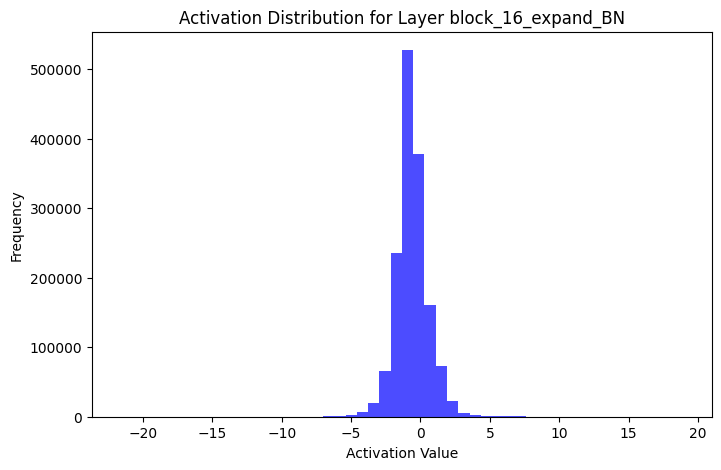

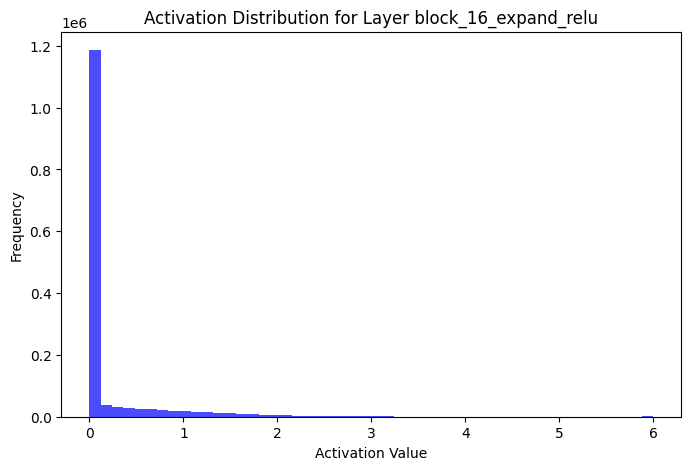

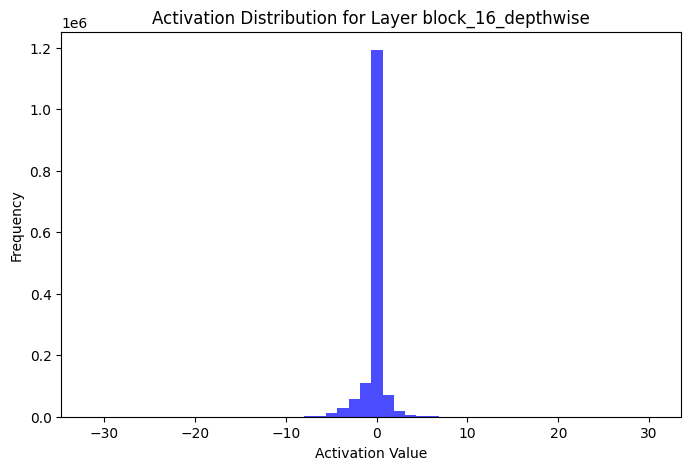

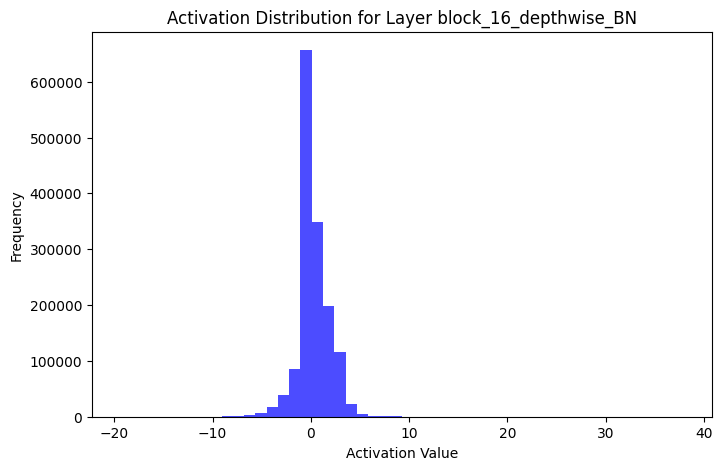

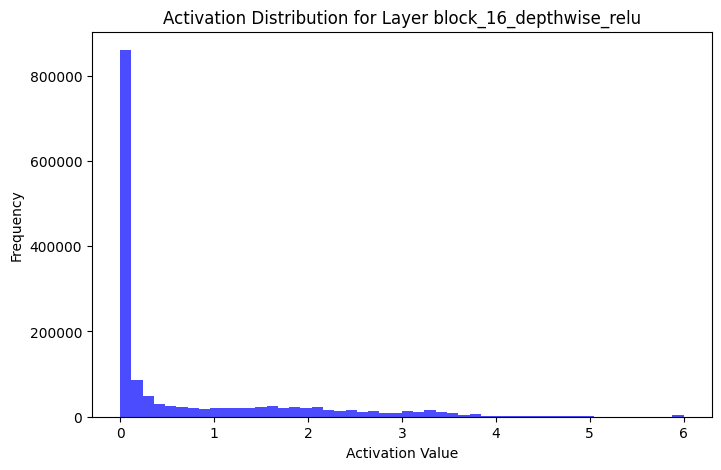

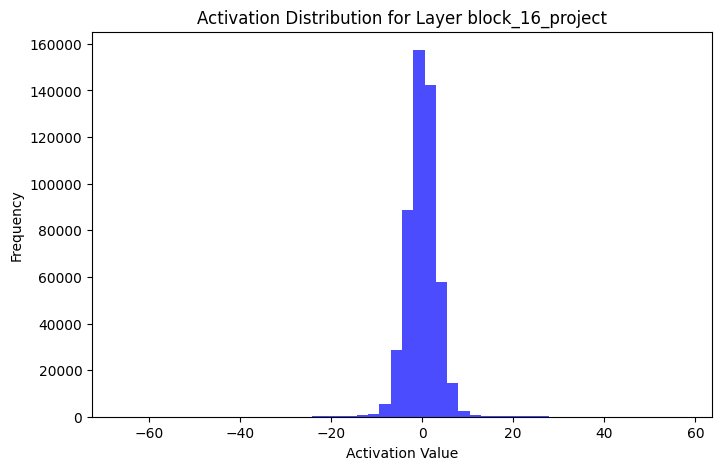

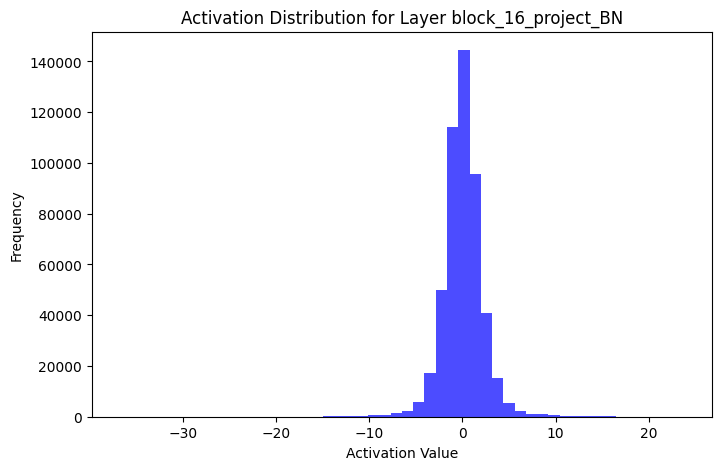

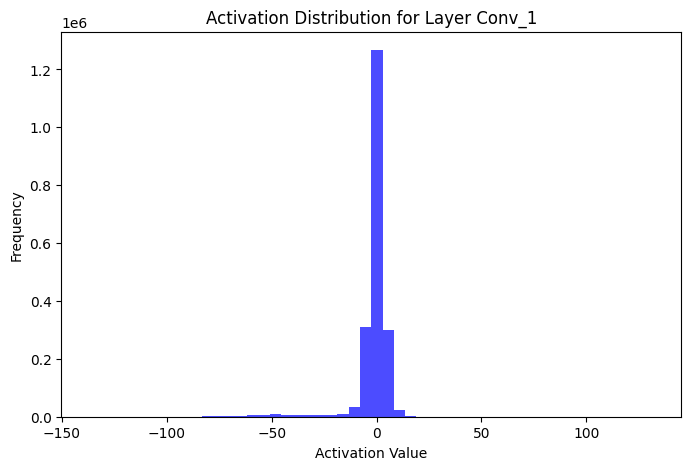

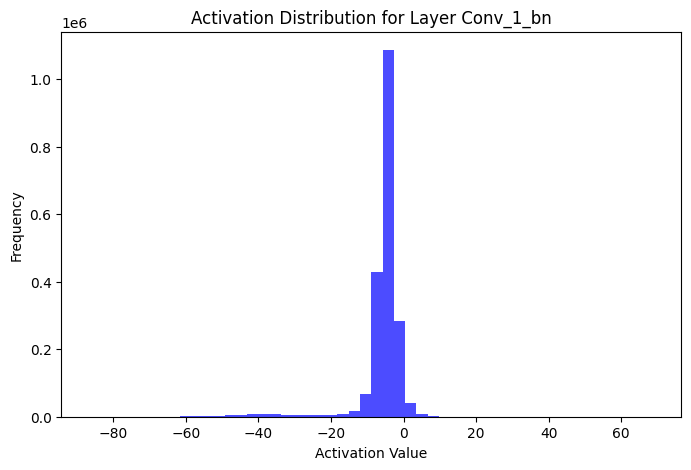

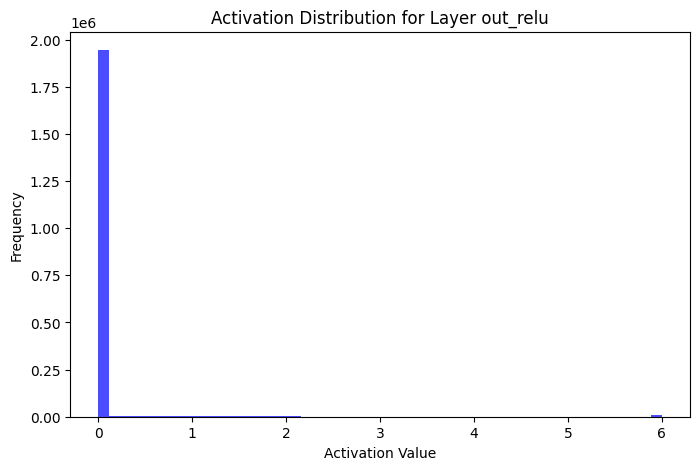

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize activations for the last 10 trainable layers
for i, activation in enumerate(activations[-10:]):  # Last 10 layers
    plt.figure(figsize=(8, 5))
    plt.hist(activation.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Activation Distribution for Layer {mobilenet.layers[-10 + i].name}")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    plt.show()


10 unfrozen layers replaced by ELU

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-10:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.0)

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-10]:
    layer.trainable = False
for layer in mobilenet.layers[-10:]:
    layer.trainable = True

# Build the model with MaxPooling2D and Flatten
model = models.Sequential([
    mobilenet,
    layers.MaxPooling2D(pool_size=(7, 7)),
    layers.Flatten(),
    layers.Dense(120, activation='softmax')
])

# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 162s 405ms/step - accuracy: 0.1527 - loss: 5.3837 - val_accuracy: 0.2869 - val_loss: 4.6491
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 188s 376ms/step - accuracy: 0.3513 - loss: 2.7569 - val_accuracy: 0.3422 - val_loss: 4.3181
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 401ms/step - accuracy: 0.4048 - loss: 2.5677 - val_accuracy: 0.4659 - val_loss: 2.7555
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 192s 374ms/step - accuracy: 0.4303 - loss: 2.3577 - val_accuracy: 0.3952 - val_loss: 3.5335
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 392ms/step - accuracy: 0.4620 - loss: 2.1920 - val_accuracy: 0.4563 - val_loss: 3.0695
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 398ms/step - accuracy: 0.4847 - loss: 2.0229 - val_accuracy: 0.5702 - val_loss: 2.0302
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 191s 369ms/step - accuracy: 0.5005 - loss: 1.9022 - val_accuracy: 0.5603 - val_loss: 2.1177
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 405ms/step - accuracy: 0.5272 -

Hyperparameter Tuning for the best Alpha

In [ ]:
# Define a list of alpha values to try
alpha_values = [0.5, 1.5, 2.0]

# Iterate over different alpha values
for alpha in alpha_values:
    print(f"\nTraining with alpha = {alpha}\n")

    # Replace ReLU with ELU for the current alpha value
    for layer in mobilenet.layers[-10:]:
        if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
            layer.activation = ELU(alpha=alpha)


    model = models.Sequential([
        mobilenet,
        layers.MaxPooling2D(pool_size=(7, 7)),
        layers.Flatten(),
        layers.Dense(120, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Add Early Stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=20,  # Set a smaller max epoch for efficiency
        callbacks=[early_stopping]
    )

    # Evaluate the model
    results = model.evaluate(test_ds)
    print(f"Alpha: {alpha}, Test Accuracy: {results[1] * 100:.2f}%")




Training with alpha = 0.5

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 378ms/step - accuracy: 0.2713 - loss: 3.1772 - val_accuracy: 0.5529 - val_loss: 1.9233
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 147s 393ms/step - accuracy: 0.4868 - loss: 1.8147 - val_accuracy: 0.6086 - val_loss: 1.7023
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 195s 375ms/step - accuracy: 0.5283 - loss: 1.6581 - val_accuracy: 0.6679 - val_loss: 1.3154
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 155s 409ms/step - accuracy: 0.5459 - loss: 1.5748 - val_accuracy: 0.6540 - val_loss: 1.4709
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 141s 375ms/step - accuracy: 0.5810 - loss: 1.4567 - val_accuracy: 0.6456 - val_loss: 1.5827
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 143s 377ms/step - accuracy: 0.5962 - loss: 1.3826 - val_accuracy: 0.6423 - val_loss: 1.6374
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 365ms/step - accuracy: 0.6082 - loss: 1.3187 - val_accuracy: 0.6924 - val_loss: 1.2182
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 388

Increasing Batch Size from 32 to 64

In [9]:
import tensorflow as tf
import os

# Directory paths for cropped images
train_dir = 'cropped_images/train'
test_dir = 'cropped_images/test'

# Create a TensorFlow Dataset for training images with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Resize images to a fixed size
    batch_size=64,           # Define a manageable batch size
    label_mode='categorical' # Use categorical for multi-class classification
)

# Create a TensorFlow Dataset for test images with normalization
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=64,
    label_mode='categorical'
)

# Normalize the images by scaling pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

# Apply normalization and data augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))

# Apply only normalization to the test dataset
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("Datasets prepared with normalization and data augmentation applied to training data.")

Found 12000 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.
Datasets prepared with normalization and data augmentation applied to training data.


Added Convolution Layer with Batch Normalization

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-10:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-10]:
    layer.trainable = False
for layer in mobilenet.layers[-10:]:
    layer.trainable = True

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.ELU(alpha=1.5),
    layers.MaxPooling2D(pool_size=(7, 7)),
    layers.Flatten(),
    layers.Dense(120, activation='softmax')
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")


Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 163s 809ms/step - accuracy: 0.2146 - loss: 4.0632 - val_accuracy: 0.6741 - val_loss: 1.0836
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 186s 987ms/step - accuracy: 0.4846 - loss: 1.9126 - val_accuracy: 0.7147 - val_loss: 0.9605
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 157s 748ms/step - accuracy: 0.5432 - loss: 1.6546 - val_accuracy: 0.7136 - val_loss: 0.9601
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 754ms/step - accuracy: 0.5921 - loss: 1.4724 - val_accuracy: 0.7169 - val_loss: 0.9651
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 153s 811ms/step - accuracy: 0.6192 - loss: 1.3670 - val_accuracy: 0.7049 - val_loss: 1.0057
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 751ms/step - accuracy: 0.6437 - loss: 1.2448 - val_accuracy: 0.7115 - val_loss: 0.9738
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 770ms/step - accuracy: 0.6688 - loss: 1.1606 - val_accuracy: 0.7262 - val_loss: 0.9591
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 758ms/step - accuracy: 0.6834 -

Training with 10 unfrozen layers and Added Dropout

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-10:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-10]:
    layer.trainable = False
for layer in mobilenet.layers[-10:]:
    layer.trainable = True

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.ELU(alpha=1.5),
    layers.MaxPooling2D(pool_size=(7, 7)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(120, activation='softmax')
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,
    callbacks=[early_stopping]
)


results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")


for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 172s 846ms/step - accuracy: 0.1492 - loss: 4.5277 - val_accuracy: 0.6671 - val_loss: 1.0925
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 188s 800ms/step - accuracy: 0.4002 - loss: 2.2956 - val_accuracy: 0.7041 - val_loss: 0.9896
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 751ms/step - accuracy: 0.4641 - loss: 2.0173 - val_accuracy: 0.7133 - val_loss: 0.9688
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 151s 803ms/step - accuracy: 0.5063 - loss: 1.8065 - val_accuracy: 0.7374 - val_loss: 0.9036
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 195s 762ms/step - accuracy: 0.5398 - loss: 1.6884 - val_accuracy: 0.7174 - val_loss: 1.0071
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 150s 796ms/step - accuracy: 0.5623 - loss: 1.5787 - val_accuracy: 0.7237 - val_loss: 0.9779
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 152s 809ms/step - accuracy: 0.5846 - loss: 1.4432 - val_accuracy: 0.7240 - val_loss: 0.9870
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 202s 811ms/step - accuracy: 0.5963 -

Training with 30 unfrozen layers

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-30:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)
# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-30]:
    layer.trainable = False
for layer in mobilenet.layers[-30:]:
    layer.trainable = True

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.ELU(alpha=1.5),
    layers.MaxPooling2D(pool_size=(7, 7)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(120, activation='softmax')
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 197s 953ms/step - accuracy: 0.0156 - loss: 7.5466 - val_accuracy: 0.2225 - val_loss: 3.5006
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 180s 879ms/step - accuracy: 0.0922 - loss: 4.5740 - val_accuracy: 0.4864 - val_loss: 2.1530
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 201s 868ms/step - accuracy: 0.1958 - loss: 3.5004 - val_accuracy: 0.6149 - val_loss: 1.5134
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 208s 907ms/step - accuracy: 0.2786 - loss: 2.9979 - val_accuracy: 0.6739 - val_loss: 1.2028
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 161s 857ms/step - accuracy: 0.3335 - loss: 2.7093 - val_accuracy: 0.7003 - val_loss: 1.0644
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 162s 858ms/step - accuracy: 0.3735 - loss: 2.4838 - val_accuracy: 0.7168 - val_loss: 0.9784
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 164s 870ms/step - accuracy: 0.3873 - loss: 2.3761 - val_accuracy: 0.7260 - val_loss: 0.9279
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 212s 920ms/step - accuracy: 0.4119 -

Training with 50 unfrozen layers

Dropout 0.3

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-50:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-50]:
    layer.trainable = False
for layer in mobilenet.layers[-50:]:
    layer.trainable = True

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),
    layers.BatchNormalization(),
    layers.ELU(alpha=1.5),
    layers.MaxPooling2D(pool_size=(7, 7)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(120, activation='softmax')
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,
    callbacks=[early_stopping]
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")


for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 206s 920ms/step - accuracy: 0.0135 - loss: 7.7782 - val_accuracy: 0.1752 - val_loss: 3.8602
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 151s 771ms/step - accuracy: 0.0573 - loss: 5.3253 - val_accuracy: 0.4030 - val_loss: 2.5915
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 203s 775ms/step - accuracy: 0.1348 - loss: 4.1551 - val_accuracy: 0.5519 - val_loss: 1.8372
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 146s 773ms/step - accuracy: 0.1980 - loss: 3.5608 - val_accuracy: 0.6297 - val_loss: 1.4298
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 199s 757ms/step - accuracy: 0.2566 - loss: 3.1756 - val_accuracy: 0.6598 - val_loss: 1.2279
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 157s 833ms/step - accuracy: 0.2978 - loss: 2.8905 - val_accuracy: 0.6818 - val_loss: 1.1079
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 156s 827ms/step - accuracy: 0.3465 - loss: 2.6538 - val_accuracy: 0.6972 - val_loss: 1.0209
Epoch 8/30
188/188 ━━━━━━━━

Dropout 0.2

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-50:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)  # Replace ReLU with ELU

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-50]:
    layer.trainable = False  # Freeze all layers except the last 10
for layer in mobilenet.layers[-50:]:
    layer.trainable = True  # Unfreeze the last 10 layers

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),  # First added Conv2D layer without activation
    layers.BatchNormalization(),  # Batch normalization to stabilize training
    layers.ELU(alpha=1.5),  # Add ELU activation with custom alpha
    layers.MaxPooling2D(pool_size=(7, 7)),  # Reduce spatial dimensions
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dropout(0.2),  # Dropout after fully connected layer
    layers.Dense(120, activation='softmax')  # Add output layer for 120 classes
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 208s 986ms/step - accuracy: 0.0156 - loss: 7.4315 - val_accuracy: 0.1948 - val_loss: 3.6183
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 167s 859ms/step - accuracy: 0.0794 - loss: 4.6795 - val_accuracy: 0.4699 - val_loss: 2.3032
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 173s 917ms/step - accuracy: 0.1867 - loss: 3.6080 - val_accuracy: 0.5909 - val_loss: 1.6352
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 196s 884ms/step - accuracy: 0.2654 - loss: 3.0939 - val_accuracy: 0.6458 - val_loss: 1.3142
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 165s 876ms/step - accuracy: 0.3208 - loss: 2.7291 - val_accuracy: 0.6765 - val_loss: 1.1510
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 867ms/step - accuracy: 0.3598 - loss: 2.4816 - val_accuracy: 0.6828 - val_loss: 1.0787
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 169s 899ms/step - accuracy: 0.3956 - loss: 2.3351 - val_accuracy: 0.7094 - val_loss: 0.9822
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 205s 916ms/step - accuracy: 0.4270 -

Dropout 0.5

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-50:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)  # Replace ReLU with ELU

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-50]:
    layer.trainable = False  # Freeze all layers except the last 10
for layer in mobilenet.layers[-50:]:
    layer.trainable = True  # Unfreeze the last 10 layers

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),  # First added Conv2D layer without activation
    layers.BatchNormalization(),  # Batch normalization to stabilize training
    layers.ELU(alpha=1.5),  # Add ELU activation with custom alpha
    layers.MaxPooling2D(pool_size=(7, 7)),  # Reduce spatial dimensions
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dropout(0.5),  # Dropout after fully connected layer
    layers.Dense(120, activation='softmax')  # Add output layer for 120 classes
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.0110 - loss: 9.4740 - val_accuracy: 0.1438 - val_loss: 4.0955
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.0301 - loss: 6.9551 - val_accuracy: 0.3457 - val_loss: 3.0334
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0608 - loss: 5.7296 - val_accuracy: 0.4890 - val_loss: 2.2845
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.1098 - loss: 4.8593 - val_accuracy: 0.5670 - val_loss: 1.7576
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1690 - loss: 4.1608 - val_accuracy: 0.6198 - val_loss: 1.4327
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2121 - loss: 3.7559 - val_accuracy: 0.6570 - val_loss: 1.2308
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.2671 - loss: 3.3610 - val_accuracy: 0.6791 - val_loss: 1.1155
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy:

In [ ]:
# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {round(results[1] * 100)}%")

68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.7966 - loss: 0.7130
Test Accuracy: 80%


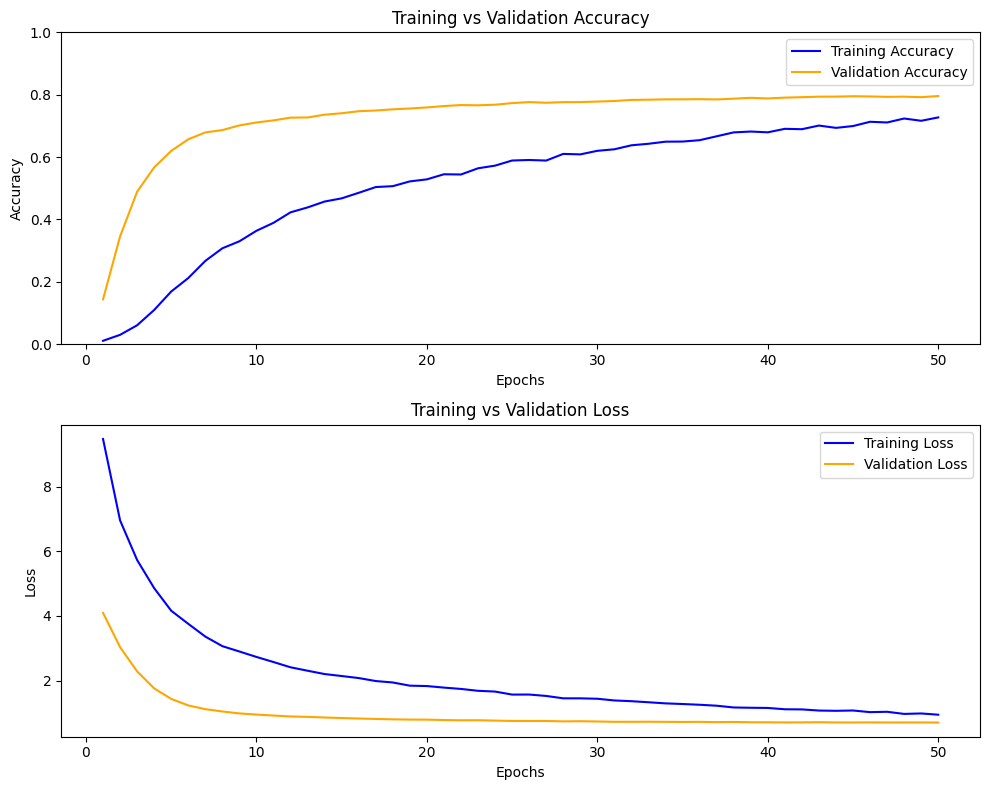

In [ ]:
import matplotlib.pyplot as plt

training_acc = history.history['accuracy']
training_loss = history.history['loss']
validation_acc = history.history['val_accuracy']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_acc) + 1)

# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 plots, 1 column

# Plotting training vs validation accuracy
axs[0].plot(epochs, training_acc, label='Training Accuracy', color='blue')
axs[0].plot(epochs, validation_acc, label='Validation Accuracy', color='orange')
axs[0].set_title('Training vs Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0, 1)
axs[0].legend()

# Plotting training vs validation loss
axs[1].plot(epochs, training_loss, label='Training Loss', color='blue')
axs[1].plot(epochs, validation_loss, label='Validation Loss', color='orange')
axs[1].set_title('Training vs Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image 1:
  True Label: n02086910-papillon
  Predicted Label: n02113023-pembroke


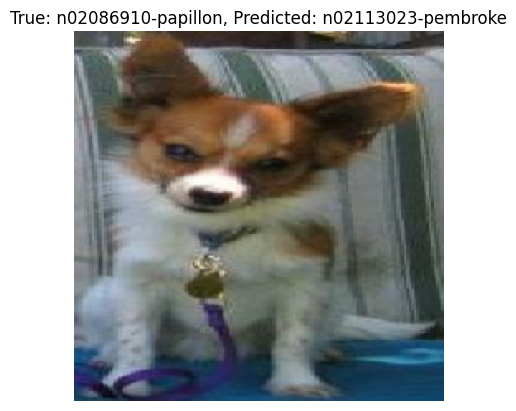

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image 2:
  True Label: n02112706-brabancon_griffon
  Predicted Label: n02101006-gordon_setter


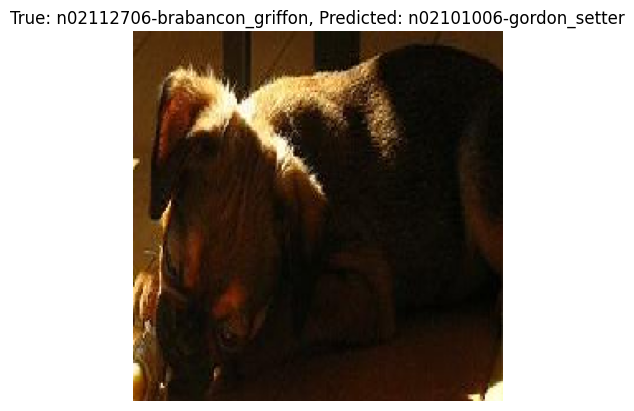

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image 3:
  True Label: n02087046-toy_terrier
  Predicted Label: n02087046-toy_terrier


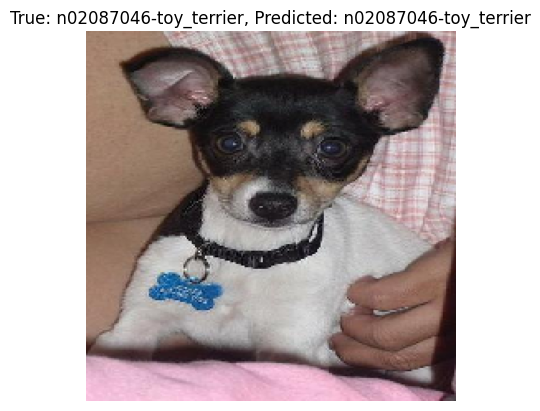

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image 4:
  True Label: n02086240-shih-tzu
  Predicted Label: n02086240-shih-tzu


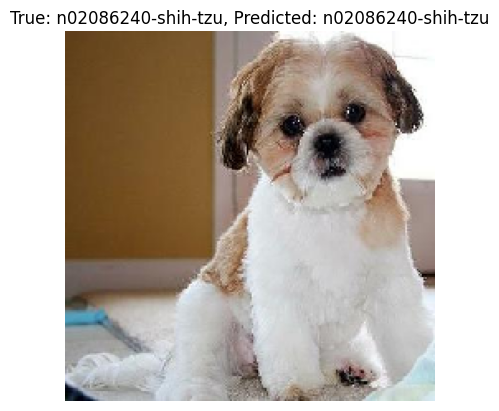

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image 5:
  True Label: n02108089-boxer
  Predicted Label: n02108089-boxer


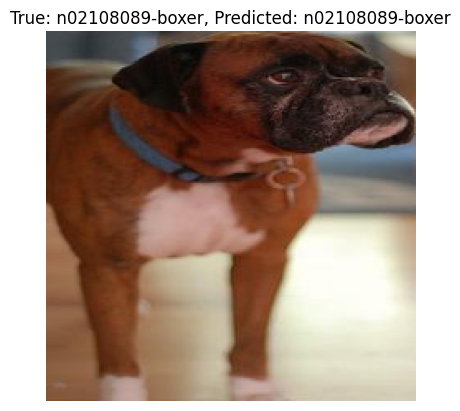

In [68]:
# Get a list of all subdirectories (class labels) in the test directory
class_names = sorted(os.listdir(test_dir))

# Select 5 random images from the test dataset
import random
selected_images = []
selected_labels = []
for class_name in random.sample(class_names, 5):  # Select 5 random classes
    class_dir = os.path.join(test_dir, class_name)
    images_in_class = os.listdir(class_dir)
    if images_in_class:
        selected_image_path = os.path.join(class_dir, random.choice(images_in_class))
        selected_images.append(selected_image_path)
        selected_labels.append(class_name)


# Preprocess and predict
for i in range(len(selected_images)):

    img = tf.keras.preprocessing.image.load_img(selected_images[i], target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]


    print(f"Image {i+1}:")
    print(f"  True Label: {selected_labels[i]}")
    print(f"  Predicted Label: {predicted_class}")

    plt.imshow(img)
    plt.title(f"True: {selected_labels[i]}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [ ]:
import os

# Set the directory path
output_dir_test = "cropped_images/test"

# List all subdirectories in the given directory
subfolders = [f for f in os.listdir(output_dir_test) if os.path.isdir(os.path.join(output_dir_test, f))]

# Create a dictionary with indexes 0 to 129
subfolders_dict = {index: subfolder for index, subfolder in enumerate(subfolders[:130])}

# Print the dictionary
print(subfolders_dict)


{0: 'n02093256-staffordshire_bullterrier', 1: 'n02097130-giant_schnauzer', 2: 'n02107142-doberman', 3: 'n02096051-airedale', 4: 'n02098413-lhasa', 5: 'n02104365-schipperke', 6: 'n02098105-soft-coated_wheaten_terrier', 7: 'n02085620-chihuahua', 8: 'n02099267-flat-coated_retriever', 9: 'n02091831-saluki', 10: 'n02093754-border_terrier', 11: 'n02091032-italian_greyhound', 12: 'n02085936-maltese_dog', 13: 'n02099429-curly-coated_retriever', 14: 'n02111277-newfoundland', 15: 'n02089078-black-and-tan_coonhound', 16: 'n02113624-toy_poodle', 17: 'n02102973-irish_water_spaniel', 18: 'n02093859-kerry_blue_terrier', 19: 'n02115641-dingo', 20: 'n02086240-shih-tzu', 21: 'n02097047-miniature_schnauzer', 22: 'n02093647-bedlington_terrier', 23: 'n02106662-german_shepherd', 24: 'n02109525-saint_bernard', 25: 'n02110063-malamute', 26: 'n02110806-basenji', 27: 'n02097474-tibetan_terrier', 28: 'n02106550-rottweiler', 29: 'n02099712-labrador_retriever', 30: 'n02085782-japanese_spaniel', 31: 'n02086910-papi

In [ ]:
true_labels = []
predicted_labels = []

for i in range(len(y_true)):
    true_labels.append(subfolders_dict[y_true[i]])
    predicted_labels.append(subfolders_dict[y_pred[i]])

print(true_labels)
print(predicted_labels)

['n02097047-miniature_schnauzer', 'n02099429-curly-coated_retriever', 'n02085936-maltese_dog', 'n02104029-kuvasz', 'n02105641-old_english_sheepdog', 'n02096294-australian_terrier', 'n02101006-gordon_setter', 'n02091635-otterhound', 'n02113799-standard_poodle', 'n02093859-kerry_blue_terrier', 'n02095570-lakeland_terrier', 'n02091467-norwegian_elkhound', 'n02110958-pug', 'n02112137-chow', 'n02090379-redbone', 'n02106662-german_shepherd', 'n02111277-newfoundland', 'n02095889-sealyham_terrier', 'n02102040-english_springer', 'n02111129-leonberg', 'n02092002-scottish_deerhound', 'n02102480-sussex_spaniel', 'n02102040-english_springer', 'n02101556-clumber', 'n02107142-doberman', 'n02102973-irish_water_spaniel', 'n02105056-groenendael', 'n02089867-walker_hound', 'n02095889-sealyham_terrier', 'n02093991-irish_terrier', 'n02105412-kelpie', 'n02095889-sealyham_terrier', 'n02101556-clumber', 'n02108551-tibetan_mastiff', 'n02091032-italian_greyhound', 'n02109961-eskimo_dog', 'n02088632-bluetick', '

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels)
print(report)

                                          precision    recall  f1-score   support

                     n02085620-chihuahua       0.79      0.76      0.77        72
              n02085782-japanese_spaniel       0.95      0.93      0.94        82
                   n02085936-maltese_dog       0.88      0.86      0.87        87
                      n02086079-pekinese       0.80      0.79      0.80        97
                      n02086240-shih-tzu       0.75      0.82      0.78        82
              n02086646-blenheim_spaniel       0.75      0.81      0.78        52
                      n02086910-papillon       0.81      0.90      0.86        72
                   n02087046-toy_terrier       0.73      0.73      0.73       113
           n02087394-rhodesian_ridgeback       0.77      0.79      0.78        68
                  n02088094-afghan_hound       0.73      0.54      0.62        59
                        n02088238-basset       0.80      0.79      0.79        84
               

Experimenting with 100 Layers

In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ELU
import tensorflow as tf

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-100:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)  # Replace ReLU with ELU

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-100]:
    layer.trainable = False  # Freeze all layers except the last 10
for layer in mobilenet.layers[-100:]:
    layer.trainable = True  # Unfreeze the last 10 layers

model = models.Sequential([
    mobilenet,
    layers.Conv2D(512, (5, 5), padding='same'),  # First added Conv2D layer without activation
    layers.BatchNormalization(),  # Batch normalization to stabilize training
    layers.ELU(alpha=1.5),  # Add ELU activation with custom alpha
    layers.MaxPooling2D(pool_size=(7, 7)),  # Reduce spatial dimensions
    layers.Flatten(),  # Flatten the feature map to a 1D vector
    layers.Dropout(0.2),  # Dropout after fully connected layer
    layers.Dense(120, activation='softmax')  # Add output layer for 120 classes
])


# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 897ms/step - accuracy: 0.0142 - loss: 7.2127 - val_accuracy: 0.1712 - val_loss: 3.7220
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 148s 784ms/step - accuracy: 0.0671 - loss: 4.7766 - val_accuracy: 0.4444 - val_loss: 2.4059
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 148s 785ms/step - accuracy: 0.1797 - loss: 3.6949 - val_accuracy: 0.5922 - val_loss: 1.6471
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 202s 787ms/step - accuracy: 0.2639 - loss: 3.0895 - val_accuracy: 0.6568 - val_loss: 1.2798
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 770ms/step - accuracy: 0.3241 - loss: 2.7189 - val_accuracy: 0.6775 - val_loss: 1.1346
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 157s 835ms/step - accuracy: 0.3635 - loss: 2.4495 - val_accuracy: 0.6953 - val_loss: 1.0436
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 189s 765ms/step - accuracy: 0.4130 - loss: 2.2606 - val_accuracy: 0.7100 - val_loss: 0.9777
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 155s 823ms/step - accuracy: 0.4353 -

Experimenting with Kernel Size

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the inverted residual block
def inverted_residual_block(inputs, expansion_factor=6, output_channels=512, stride=1, kernel_size=5, alpha=1.5):
    input_channels = inputs.shape[-1]

    # Expansion phase: 1x1 convolution to increase the number of channels
    x = layers.Conv2D(expansion_factor * input_channels, (1, 1), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ELU(alpha=alpha)(x)

    # Depthwise separable convolution phase
    x = layers.DepthwiseConv2D(kernel_size=kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ELU(alpha=alpha)(x)


    x = layers.Conv2D(output_channels, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if input_channels == output_channels:
        x = layers.Add()([x, inputs])

    return x

# Function to train and evaluate the model for different kernel sizes
def evaluate_kernel_size(kernel_size):
    # Load MobileNetV2 without the top layer
    mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Replace ReLU with ELU in the last 10 layers
    for layer in mobilenet.layers[-50:]:
        if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
            layer.activation = layers.ELU(alpha=1.5)

    # Make only the last 10 layers trainable
    for layer in mobilenet.layers[:-50]:
        layer.trainable = False
    for layer in mobilenet.layers[-50:]:
        layer.trainable = True

    # Functional API: Define the input layer
    inputs = layers.Input(shape=(224, 224, 3))

    # Use MobileNetV2 as the base model
    x = mobilenet(inputs)

    # Apply the inverted residual block with the current kernel size
    x = inverted_residual_block(x, output_channels=512, kernel_size=kernel_size)

    # Add the rest of the layers
    x = layers.MaxPooling2D(pool_size=(7, 7))(x)  # Reduce spatial dimensions
    x = layers.Flatten()(x)  # Flatten the feature map to a 1D vector
    x = layers.Dropout(0.2)(x)  # Dropout after fully connected layer
    x = layers.Dense(120, activation='softmax')(x)  # Output layer for 120 classes

    # Create the model using the Functional API
    model = models.Model(inputs, x)

    # Compile the model with a smaller learning rate for fine-tuning
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop training if no improvement for 5 epochs
        restore_best_weights=True  # Restore the best weights
    )

    # Train the model
    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=30,
        callbacks=[early_stopping]
    )

    # Evaluate the model
    results = model.evaluate(test_ds)
    print(f"Kernel Size: {kernel_size}, Test Accuracy: {results[1] * 100:.2f}%")

# List of kernel sizes to test
kernel_sizes = [2, 3, 4, 6]

# Loop through each kernel size and evaluate
for kernel_size in kernel_sizes:
    evaluate_kernel_size(kernel_size)


Epoch 1/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.0085 - loss: 7.8651 - val_accuracy: 0.0379 - val_loss: 4.7519
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 103s 957ms/step - accuracy: 0.0212 - loss: 5.9679 - val_accuracy: 0.1216 - val_loss: 4.6349
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 103s 960ms/step - accuracy: 0.0473 - loss: 5.0749 - val_accuracy: 0.2351 - val_loss: 4.3715
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 104s 971ms/step - accuracy: 0.0746 - loss: 4.5300 - val_accuracy: 0.3477 - val_loss: 3.8835
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 104s 971ms/step - accuracy: 0.1157 - loss: 4.0826 - val_accuracy: 0.4316 - val_loss: 3.1775
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 104s 973ms/step - accuracy: 0.1754 - loss: 3.6862 - val_accuracy: 0.5009 - val_loss: 2.4480
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 104s 967ms/step - accuracy: 0.2063 - loss: 3.4365 - val_accuracy: 0.5575 - val_loss: 1.9215
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 104s 971ms/step - accuracy: 0.2390 - lo

In [21]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the inverted residual block
def inverted_residual_block(inputs, expansion_factor=6, output_channels=512, stride=1, kernel_size=5, alpha=1.5):
    # Get the input channels
    input_channels = inputs.shape[-1]

    # Expansion phase: 1x1 convolution to increase the number of channels
    x = layers.Conv2D(expansion_factor * input_channels, (1, 1), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ELU(alpha=alpha)(x)

    # Depthwise separable convolution phase
    x = layers.DepthwiseConv2D(kernel_size=kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ELU(alpha=alpha)(x)

    # Projection phase: 1x1 convolution to reduce the number of channels to the output size
    x = layers.Conv2D(output_channels, (1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if input_channels == output_channels:
        x = layers.Add()([x, inputs])

    return x

# Load MobileNetV2 without the top layer
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Replace ReLU with ELU in the last 10 layers
for layer in mobilenet.layers[-50:]:
    if hasattr(layer, 'activation') and layer.activation == tf.nn.relu:
        layer.activation = ELU(alpha=1.5)  # Replace ReLU with ELU

# Make only the last 10 layers trainable
for layer in mobilenet.layers[:-50]:
    layer.trainable = False  # Freeze all layers except the last 10
for layer in mobilenet.layers[-50:]:
    layer.trainable = True  # Unfreeze the last 10 layers

# Functional API: Define the input layer
inputs = layers.Input(shape=(224, 224, 3))

# Use MobileNetV2 as the base model
x = mobilenet(inputs)

# Replace Conv2D with the inverted residual block
x = inverted_residual_block(x, output_channels=512, kernel_size=5)

# Add the rest of the layers
x = layers.MaxPooling2D(pool_size=(7, 7))(x)  # Reduce spatial dimensions
x = layers.Flatten()(x)  # Flatten the feature map to a 1D vector
x = layers.Dropout(0.5)(x)  # Dropout after fully connected layer
x = layers.Dense(120, activation='softmax')(x)  # Add output layer for 120 classes

# Create the model using the Functional API
model = models.Model(inputs, x)

# Compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop training if no improvement for 5 epochs
    restore_best_weights=True  # Restore the best weights
)

# Train the model with Early Stopping
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,  # Max epochs
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Evaluate the model
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1] * 100:.2f}%")

# Verify which layers are trainable
for i, layer in enumerate(mobilenet.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.0105 - loss: 10.0877 - val_accuracy: 0.0443 - val_loss: 4.7025
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 941ms/step - accuracy: 0.0196 - loss: 7.7038 - val_accuracy: 0.1672 - val_loss: 4.2867
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 179s 950ms/step - accuracy: 0.0386 - loss: 6.3528 - val_accuracy: 0.3508 - val_loss: 3.3185
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 176s 935ms/step - accuracy: 0.0756 - loss: 5.3639 - val_accuracy: 0.4717 - val_loss: 2.3406
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 942ms/step - accuracy: 0.1028 - loss: 4.7139 - val_accuracy: 0.5491 - val_loss: 1.8269
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 942ms/step - accuracy: 0.1424 - loss: 4.2785 - val_accuracy: 0.5930 - val_loss: 1.5646
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 180s 955ms/step - accuracy: 0.1713 - loss: 3.9100 - val_accuracy: 0.6253 - val_loss: 1.3950
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 177s 938ms/step - accuracy: 0.2163 - l